<a href="https://colab.research.google.com/github/zainab9271/AI-Dojo_Machine_learning_bootcamp/blob/main/Assignment_02_Data_Processing_Zainab_Shakor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 02: Data Processing 

This week's assignment is to prepare a dataset for a machine learning algorithm that can accurately identify wines types.  

**Before starting copy this file and work on your own copy by going to File > Save Copy in Drive. Then add your name to the file (e.g., Assignment 02: Data Processing - Muntadher Alkaabi)**

**Note: the submission deadline is : 1/27/2022 at 3:00 PM**


Requirements:

1.   Read CSV file into a DataFrame.
2.   Print the `describe` and `info` of the DataFrame.
3.   Drop the columns (Unnamed, designation, Region_2, Taster_name, Taster_twitter_handle, Title, and Province).
4. Fill in the missing values in `price` using the mean value of each column and in `point` using the median value of each column.
5. Drop the rows that have missing values in the following columns (description, region_1, variety, country, winery)
6. Convert the text to integer vector in column  `description`
7. Convert text values to numerical values in (Country, Region_1, Variety, Winery).
8. Split the data into inputs/features (x) and output/target ( y ).
9. Print the `describe` and `info` of the dataset.
10. Plot the `histogram` for x and set the size of the plots to (10,10).
11. Save the modified DataFrame to a CSV file.


Dataset download [link](https://drive.google.com/file/d/1LQAW9gQwIdwd3NXpqFAEEyamyU6kNrpF/view?usp=sharing).



Upload your notebook file [here](https://forms.gle/PBDgHkJeb7mQZaXm7).​​​​​​​

Good luck and feel free to ask any questions on our Teams channels.


# Import Python Libraries 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1- Read CSV file

In [ ]:
# Downlowd the dataset 
!wget -O winemag-data-assignment-02.csv 'https://drive.google.com/u/0/uc?id=1LQAW9gQwIdwd3NXpqFAEEyamyU6kNrpF&export=download'

--2022-02-01 12:09:03--  https://drive.google.com/u/0/uc?id=1LQAW9gQwIdwd3NXpqFAEEyamyU6kNrpF&export=download
Resolving drive.google.com (drive.google.com)... 172.217.193.101, 172.217.193.100, 172.217.193.138, ...
Connecting to drive.google.com (drive.google.com)|172.217.193.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-1o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/i27hb53n747bm8n57uggkmvlov11jipe/1643717325000/12354821778029633344/*/1LQAW9gQwIdwd3NXpqFAEEyamyU6kNrpF?e=download [following]
--2022-02-01 12:09:05--  https://doc-0k-1o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/i27hb53n747bm8n57uggkmvlov11jipe/1643717325000/12354821778029633344/*/1LQAW9gQwIdwd3NXpqFAEEyamyU6kNrpF?e=download
Resolving doc-0k-1o-docs.googleusercontent.com (doc-0k-1o-docs.googleusercontent.com)... 108.177.11.132, 2607:f8b0:400c:c01::84
Connecting to doc-0k-1o-docs.googleusercontent.com

In [ ]:
# Read the csv file 
df = pd.read_csv('/content/winemag-data-assignment-02.csv')
df 

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87.0,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87.0,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87.0,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87.0,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87.0,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6154,6154,Australia,The top Australian Cabernets retain distinct v...,NaN,89.0,32.0,Victoria,Pyrenees,NaN,Joe Czerwinski,@JoeCz,Taltarni 2004 Cabernet Sauvignon (Pyrenees),Cabernet Sauvignon,Taltarni
6155,6155,Chile,"Really good wine with blasting dark fruit, win...",Kuyen,89.0,30.0,Maipo Valley,NaN,NaN,Michael Schachner,@wineschach,Antiyal 2006 Kuyen Red (Maipo Valley),Red Blend,Antiyal
6156,6156,France,Importer Bobby Kacher seemingly has a pipeline...,Cuvée Tradition,89.0,13.0,Rhône Valley,Costières de Nîmes,NaN,Joe Czerwinski,@JoeCz,Mas des Bressades 2008 Cuvée Tradition Rosé (C...,Rosé,Mas des Bressades
6157,6157,US,"With a ruby-crimson color, this sparkling wine...",Rouge,89.0,35.0,California,Napa Valley,Napa,NaN,NaN,Frank Family NV Rouge Sparkling (Napa Valley),Sparkling Blend,Frank Family


# 2- Print the info of the DataFrame

In [ ]:
# Use the info method to print out the informations of the dataset
# Print the info of the DataFrame
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6159 entries, 0 to 6158
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             6159 non-null   int64  
 1   country                6156 non-null   object 
 2   description            6159 non-null   object 
 3   designation            4324 non-null   object 
 4   points                 6132 non-null   float64
 5   price                  5737 non-null   float64
 6   province               6156 non-null   object 
 7   region_1               5176 non-null   object 
 8   region_2               2423 non-null   object 
 9   taster_name            4910 non-null   object 
 10  taster_twitter_handle  4707 non-null   object 
 11  title                  6159 non-null   object 
 12  variety                6159 non-null   object 
 13  winery                 6159 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 673.8+

In [ ]:
# Find out how many nan value in every column.
df.isnull().sum()



Unnamed: 0                  0
country                     3
description                 0
designation              1835
points                     27
price                     422
province                    3
region_1                  983
region_2                 3736
taster_name              1249
taster_twitter_handle    1452
title                       0
variety                     0
winery                      0
dtype: int64

# 3- Drop columns 
Drop the columns (Designation, Region_2, Taster_name, Taster_twitter_handle, Title,Province).

In [ ]:
# Create columns list that you want to drop
drop_columns = ['Unnamed: 0', 'designation', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'province']


# Drop the columns 
df.drop(drop_columns, axis=1, inplace=True)



In [ ]:
print(df)

        country  ...               winery
0         Italy  ...              Nicosia
1      Portugal  ...  Quinta dos Avidagos
2            US  ...            Rainstorm
3            US  ...           St. Julian
4            US  ...         Sweet Cheeks
...         ...  ...                  ...
6154  Australia  ...             Taltarni
6155      Chile  ...              Antiyal
6156     France  ...    Mas des Bressades
6157         US  ...         Frank Family
6158         US  ...                 Hobo

[6159 rows x 7 columns]


In [ ]:
# Print info about the data frame
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6159 entries, 0 to 6158
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      6156 non-null   object 
 1   description  6159 non-null   object 
 2   points       6132 non-null   float64
 3   price        5737 non-null   float64
 4   region_1     5176 non-null   object 
 5   variety      6159 non-null   object 
 6   winery       6159 non-null   object 
dtypes: float64(2), object(5)
memory usage: 336.9+ KB


In [ ]:
# Check the number nan values in the columns 
df.isnull().sum()

 

country          3
description      0
points          27
price          422
region_1       983
variety          0
winery           0
dtype: int64

# 4- Fill in missing values 
Fill in missing values in (price) using the mean value of the column and in (point) using the median value of the column.

In [ ]:
# Replace the nan values in the col price with hte mean
# when filling, first think about filling the numeric values, we fill with mean value to not affect the distribution of data
df.price.fillna(df.price.mean(), inplace=True)

In [ ]:
# Replace the nan values in the col points with hte mean
df.points.fillna(df.points.median(), inplace=True)



In [ ]:
# Check the number nan values in the columns 
df.isnull().sum()



country          3
description      0
points           0
price            0
region_1       983
variety          0
winery           0
dtype: int64

In [ ]:
# Print the info od the DataFrame
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6159 entries, 0 to 6158
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      6156 non-null   object 
 1   description  6159 non-null   object 
 2   points       6159 non-null   float64
 3   price        6159 non-null   float64
 4   region_1     5176 non-null   object 
 5   variety      6159 non-null   object 
 6   winery       6159 non-null   object 
dtypes: float64(2), object(5)
memory usage: 336.9+ KB


# 5- Drop the rows that have missing values in the flowing columns (description, region_1, variety, country, winery)



In [ ]:
# Drop the rows that have missing values 
# because they are not continuous values, they are discrete and we must drop them 
# or we can execute a model to predict their missing values

df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop(labels=['index'], axis=1, inplace=True)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5176 entries, 0 to 5175
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      5176 non-null   object 
 1   description  5176 non-null   object 
 2   points       5176 non-null   float64
 3   price        5176 non-null   float64
 4   region_1     5176 non-null   object 
 5   variety      5176 non-null   object 
 6   winery       5176 non-null   object 
dtypes: float64(2), object(5)
memory usage: 283.2+ KB


# 6- Convert the text to integer vector in column (description)

In [ ]:
# Create the text dataset for the Tokenizer   
text= ' '.join(df.description)

In [ ]:
# Create the Tokenizer 

class Tokenizer:

    def __init__(
        self,
        row_text,
        filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
        oov='<OOV>',
        ):
        """
        The __init__ method  of the class Tokenizer will get the following parameters
        row_text : the input text that we wnat to create the tokenizer from it.
        filters : a string where each element is a character that will be filtered from the texts. 
        The default is all punctuation, plus tabs and line breaks, minus the ' character.
        oov : if given, it will be added to word_index and used to replace out-of-vocabulary words during text_to_sequence calls
        """

        self.row_text = row_text
        self.filters = filters
        self.oov = oov

        # create the word to index and index to word dictionaries using the tokenizer method

        (self.word_index, self.index_word) = self.tokenizer(self.row_text)

    def clean_text(self, text):
        """
        The clean_text method will take one parameter text 
        then the method will clean the text data 
        and return clean text
        """

        text = text.lower()  # convert the texts to lowercase.

        # clean the text

        for i in text:
            if i in self.filters:

                text = text.replace(i, ' ')

        return text  # return the clean text

    def tokenizer(self, text):
        """
        The tokenizer method will take one parameter text 
        then the method will clean the text data. 
        extricate the unique words the method will return two dictionaries contains the unique word to index and the reverse of it.
        """

        # create the word to index dictionary

        word_index = {}

        # create the index to word dictionary

        index_word = {}

        # add the oov to the word to index & the index to word  dictionaries

        word_index[self.oov] = 0
        index_word[0] = self.oov

        # clean the text

        text = self.clean_text(text)

        # extract the unique values

        unique_words = list(set(text.split()))

        # convert the word to index and the reverse of it

        for (index, word) in enumerate(unique_words):
            word_index[word] = index + 1
            index_word[index + 1] = word

        # return word to index and the indeex to word dictionaries

        return (word_index, index_word)

    def tokenize(self, text):
        """
        the method tokenize will convert text to vector 
        text: the text paramater it's for the text that you want to convert to list of numbers
        """

        # create empty  list

        vector = []

        # clean the text

        text = self.clean_text(text)

        # split the text to words

        word_list = text.split()

        # convert the word list to

        for word in word_list:
            try:
                vector.append(self.word_index[word])
            except:
                vector.append(self.word_index[self.oov])

        # return the  vector

        return vector

    def reverse_tokenize(self, vector):
        """
        the method reverse_tokenize will convert vector  to text
        word_vector: the word_vector paramater it's for the list of number that you want to convert to string

        """

        word_list = []

        # convert from word_vector to string

        for index in vector:
            try:
                word_list.append(self.index_word[index])
            except:

                word_list.append(self.index_word[self.oov])
            text = ' '.join(word_list)

        # return the string

        return text

In [ ]:
# Write function that replace every text in the description column to vector of integers
# Note use the Tokenizer 
def get_vector(description):
    tokenizer = Tokenizer(text)
    vectors_List = []
    for desc in description:
        vectors_List.append(tokenizer.tokenize(desc))
    return vectors_List

df['description'] = get_vector(df.description)



In [ ]:
df.description

0       Aromas include tropical fruit, broom, brimston...
1       Tart and snappy, the flavors of lime flesh and...
2       Pineapple rind, lemon pith and orange blossom ...
3       Much like the regular bottling from 2012, this...
4       Blackberry and raspberry aromas show a typical...
                              ...                        
5171    This makes an interesting contrast with the 20...
5172    The top Australian Cabernets retain distinct v...
5173    Importer Bobby Kacher seemingly has a pipeline...
5174    With a ruby-crimson color, this sparkling wine...
5175    Soft and gentle, this is a Zin to drink right ...
Name: description, Length: 5176, dtype: object

In [ ]:
tokenizer = Tokenizer(text)
df.description = df.description.map(tokenizer.tokenize)

In [ ]:
df.description

0       [1235, 4422, 809, 8656, 732, 6106, 5144, 4437,...
1       [5312, 5144, 3213, 33, 2443, 2599, 7362, 6631,...
2       [3862, 5543, 131, 1680, 5144, 975, 6514, 3106,...
3       [6871, 6736, 33, 8863, 6806, 4408, 8266, 8177,...
4       [6018, 5144, 1764, 1235, 4224, 2379, 3591, 233...
                              ...                        
5171    [8177, 150, 1946, 7997, 6945, 800, 33, 4033, 9...
5172    [33, 4825, 3742, 234, 5154, 6948, 1930, 7772, ...
5173    [2054, 782, 3994, 7534, 6651, 2379, 6083, 3943...
5174    [800, 2379, 7757, 4493, 5959, 8177, 6196, 6774...
5175    [2480, 5144, 5886, 8177, 569, 2379, 6175, 3943...
Name: description, Length: 5176, dtype: object

# 7- Convert text values to numerical values

In [ ]:
# Create function that return two dictionary word to index and the other index to word 
def string_to_numerics(column):
  
  word_index = {}
  index_word = {}

  # Get the unique words
  for index, value in enumerate( column.unique()):
    word_index[value]=index
    index_word[index]=value


  # Return word to index & index to word
  return word_index, index_word

In [ ]:
# Create the string to numerics for the country col
country_index, index_country = string_to_numerics(df.country)


# Replace the string to numeric
df.country.replace(country_index, inplace=True)



In [ ]:
# Create the string to numerics for the variety col
variety_index, index_variety = string_to_numerics(df.variety)


# Replace the string to numeric 
df.variety.replace(variety_index, inplace=True)



In [ ]:
# Create the string to numerics for the winery col
winery_index, index_winery = string_to_numerics(df.winery)


# Replace the string to numeric 
df.winery.replace(winery_index, inplace=True)



In [ ]:
# Create the string to numerics for the region_1 col
region_1_index, index_region_1 = string_to_numerics(df.region_1)


# Replace the string to numeric 
df.region_1.replace(region_1_index, inplace=True)



#Split tha Dataset to x,y 

# 8- Split the data into inputs/features (x) and output/target ( y ).

In [ ]:
# Create y
y = df.price



In [ ]:
# Convert the data type of y to int64

y = y.astype(dtype=np.int64)


y

0       34
1       14
2       13
3       65
4       15
        ..
5171    34
5172    32
5173    13
5174    35
5175    25
Name: price, Length: 5176, dtype: int64

In [ ]:
# Create x 
x = df.copy()
x.drop(labels=[y.name], axis=1, inplace=True)


x

,country,description,points,region_1,variety,winery
0,0,"[1235, 4422, 809, 8656, 732, 6106, 5144, 4437,...",87.0,0,0,0
1,1,"[5312, 5144, 3213, 33, 2443, 2599, 7362, 6631,...",87.0,1,1,1
2,1,"[3862, 5543, 131, 1680, 5144, 975, 6514, 3106,...",87.0,2,2,2
3,1,"[6871, 6736, 33, 8863, 6806, 4408, 8266, 8177,...",87.0,1,3,3
4,2,"[6018, 5144, 1764, 1235, 4224, 2379, 3591, 233...",87.0,3,4,4
...,...,...,...,...,...,...
5171,3,"[8177, 150, 1946, 7997, 6945, 800, 33, 4033, 9...",89.0,34,9,3378
5172,5,"[33, 4825, 3742, 234, 5154, 6948, 1930, 7772, ...",89.0,612,7,3035
5173,3,"[2054, 782, 3994, 7534, 6651, 2379, 6083, 3943...",89.0,194,33,3379
5174,1,"[800, 2379, 7757, 4493, 5959, 8177, 6196, 6774...",89.0,6,70,691


In [ ]:
# Convert the dtype of points to int64
x = x.astype({'points': np.int64})



In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5176 entries, 0 to 5175
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   country      5176 non-null   int64 
 1   description  5176 non-null   object
 2   points       5176 non-null   int64 
 3   region_1     5176 non-null   int64 
 4   variety      5176 non-null   int64 
 5   winery       5176 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 242.8+ KB


# 9-Print the Describe  and info of the dataset.

In [ ]:
# Print the description of the x data frame
print(x.describe())



           country       points     region_1      variety       winery
count  5176.000000  5176.000000  5176.000000  5176.000000  5176.000000
mean      1.471406    88.267388   137.561437    30.282264  1476.430835
std       1.252304     2.924028   138.598838    35.096826   969.930336
min       0.000000    80.000000     0.000000     0.000000     0.000000
25%       1.000000    86.000000    32.000000     7.750000   608.000000
50%       1.000000    88.000000    79.000000    18.000000  1387.000000
75%       3.000000    90.000000   197.250000    40.000000  2284.250000
max       6.000000   100.000000   612.000000   217.000000  3379.000000


In [ ]:
# Print the information of x 
print(x.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5176 entries, 0 to 5175
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   country      5176 non-null   int64 
 1   description  5176 non-null   object
 2   points       5176 non-null   int64 
 3   region_1     5176 non-null   int64 
 4   variety      5176 non-null   int64 
 5   winery       5176 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 242.8+ KB
None


# 10- Plot a (histogram) with set the size of the plots to (10,10).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1da6c65c50>,
      dtype=object)

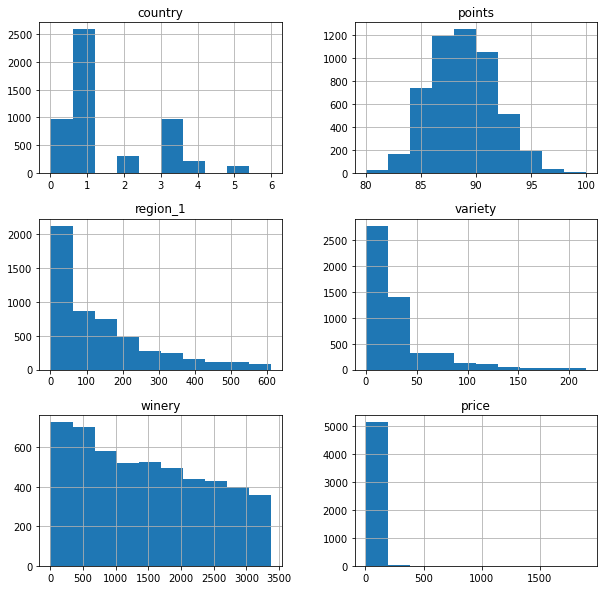

In [ ]:
# Plot the histogram for the data frame
new_df = x.copy()
new_df[y.name] = y
new_df.hist(figsize=(10,10))



# 11- Save the modified DataFrame to a CSV file.


In [ ]:
# Save the data frame plase make sure that the csv file saved without the index 
new_df.to_csv('Assigement_2.csv', index = False)



In [ ]:
# Read the data frame that you saved to make sure everything is correct
assigement_2 = pd.read_csv('/content/Assigement_2.csv')
assigement_2

,country,description,points,region_1,variety,winery,price
0,0,"[1235, 4422, 809, 8656, 732, 6106, 5144, 4437,...",87,0,0,0,34
1,1,"[5312, 5144, 3213, 33, 2443, 2599, 7362, 6631,...",87,1,1,1,14
2,1,"[3862, 5543, 131, 1680, 5144, 975, 6514, 3106,...",87,2,2,2,13
3,1,"[6871, 6736, 33, 8863, 6806, 4408, 8266, 8177,...",87,1,3,3,65
4,2,"[6018, 5144, 1764, 1235, 4224, 2379, 3591, 233...",87,3,4,4,15
...,...,...,...,...,...,...,...
5171,3,"[8177, 150, 1946, 7997, 6945, 800, 33, 4033, 9...",89,34,9,3378,34
5172,5,"[33, 4825, 3742, 234, 5154, 6948, 1930, 7772, ...",89,612,7,3035,32
5173,3,"[2054, 782, 3994, 7534, 6651, 2379, 6083, 3943...",89,194,33,3379,13
5174,1,"[800, 2379, 7757, 4493, 5959, 8177, 6196, 6774...",89,6,70,691,35
